**Chapter2 Supervised Learning**

**2.3.7 Kernerlized Support Vector Machine**

**선형 모델과 비선형 특성**

직선과 hyperplane은 유연하지 못하여, 저차원 데이터셋에서는 선형 모델이 매우 제한적이다.

선형 모델을 유연하게 만드는 한 가지 방법은, 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것이다. 

Text(0.5, 0, 'Feaature 1**2')

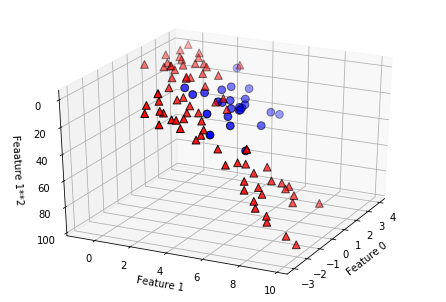

In [8]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
import mglearn
import numpy as np
import matplotlib.pyplot as plt

# 두 번째 특성을 제곱한 특성 1*2 를 새로운 특성으로 추가하여 입력 특성을 확장
# 특성0, 특성1, 특성1**2의 3차원 데이터 포인트로 표현

# 두번째 특성 제곱하여 추가.
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 먼저 그리고, 그 다음 y==1인 포인트를 그린다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feaature 1**2")

**커널기법**

실제로 데이터를 확장하지 않고, 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)을 계산. 

서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는데 많이 사용하는 방법은 2가지다.
1. 원래 특성의 간으한 조합을 지정된 차수까지 모두 계산 (예를들어, 특성1******2 X 특성2******5)하는 다항식 커널
2. 가우시안 커널은 차원이 무한한 특성 공간에 매핑하는 것. 모든 차수의 모든 다항식을 고려하는 것. 특성의 중요도는 고차항이 될수록 줄어든다. 

**SVM 이해하기**
훈련 데이터의 일부만 결정 경계를 만드는데 영향을 준다.

바로 두 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라한다. 

새로운 데이터 포인트에 대헤 예측하려면 각 서포트 벡터와의 거리를 측정한다. 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습한다. 


Text(0, 0.5, 'Feature 1')

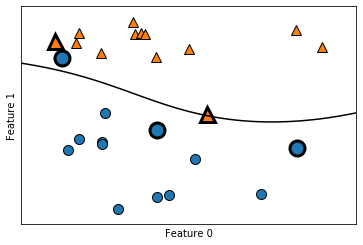

In [22]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Support Vector
sv = svm.support_vectors_

# dual_coef_부호에 의해 서포트 벡터의 클래스 레이블이 결정
sv_labels = svm.dual_coef_.ravel() >0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**SVM 매개변수 튜닝**

gamma 매개변수는 가우시안 커널 폭의 역수에 해당. 이는 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다. 작은 값은 넓은 영역을 뜻하며 큰 값은, 영향이 미치는 범위가 제한적이게 된다. 

즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커진다. 

C 매개변수는 선형모델에서 사용한것과 비슷한 규제 매개변수이다. 각 포인트의 중요도 (duel_coef_)을 제한한다.

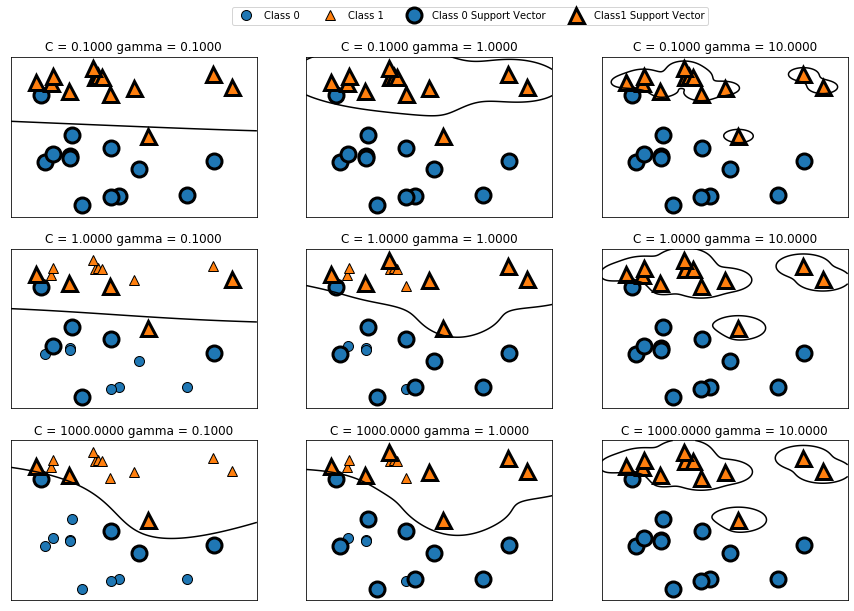

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0, 0].legend(["Class 0", "Class 1", "Class 0 Support Vector", "Class1 Support Vector"], ncol=4, loc=(.9, 1.2))

큰 gamma값은 모델의 복잡도를 높인다.

C매개변수는 작은 C의 경우 매우 제약이 큰 모델을 만들고, 데이터 포인트의 영향력을 줄인다. C를 증가시키면 이 포인트트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 한다. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Train Set Accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("Test Set Accuracy: {:.2f}".format(svc.score(X_test, y_test)))


Train Set Accuracy: 0.90
Test Set Accuracy: 0.94


Text(0, 0.5, 'Feature Size(log)')

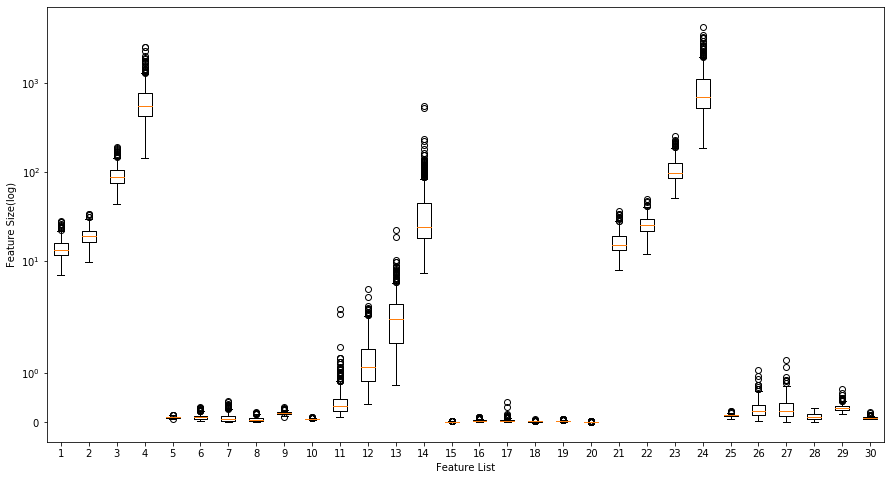

In [39]:
plt.figure(figsize=(15, 8))
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("Feature List")
plt.ylabel("Feature Size(log)")

그래프를 보면, 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다르고. 선형 모델에서 문제가 될 수 있지만, 커널 SVM에서는 영향이 매우 크기 때문에 전처리가 필요하다.

In [41]:
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값=최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최댓값은 1이다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n{}".format(X_train_scaled.max(axis=0)))

# Test Set에서도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용한다.
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Train Set Accuracy: {}".format(svc.score(X_train_scaled, y_train)))
print("Test Set Accuracy: {}".format(svc.score(X_test_scaled, y_test)))


특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Train Set Accuracy: 0.9835680751173709
Test Set Accuracy: 0.972027972027972


In [42]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Train Set Accuracy: {}".format(svc.score(X_train_scaled, y_train)))
print("Test Set Accuracy: {}".format(svc.score(X_test_scaled, y_test)))

Train Set Accuracy: 1.0
Test Set Accuracy: 0.958041958041958


**장단점**

커널 서포트 벡터 머신은 강력한 모델이며 다양한 데이터셋에서 잘 작동.

특성이 몇 개 안되더라도 복잡한 결정 경계를 만들 수 있다. 저차원과 고차원의 데이터에 모두 잘 작동하지만, 


샘플이 많을 때는 잘 맞지 않는다.10,000개의 샘플 정도면 SVM 괜찮. 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제.